<a href="https://colab.research.google.com/github/trich9/DataScienceWebsite/blob/main/Data_Science_2023_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from skimage.util import montage
!pip install wandb
import wandb as wb
from skimage.io import imread

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.show()

In [ ]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
# #MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
#train_set = datasets.KMNIST('./data', train=True, download=True)
#test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
# train_set = datasets.FashionMNIST('./data', train=True, download=True)
# test_set = datasets.FashionMNIST('./data', train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 66758263.34it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 24541266.98it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 24902299.06it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4368385.41it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
X.shape

(60000, 1, 28, 28)

In [ ]:
x = X[3,0,:,:]

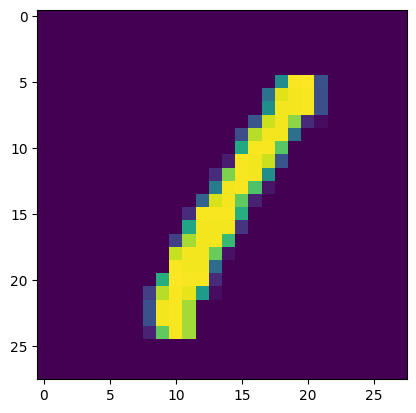

In [ ]:
plt.imshow(x)

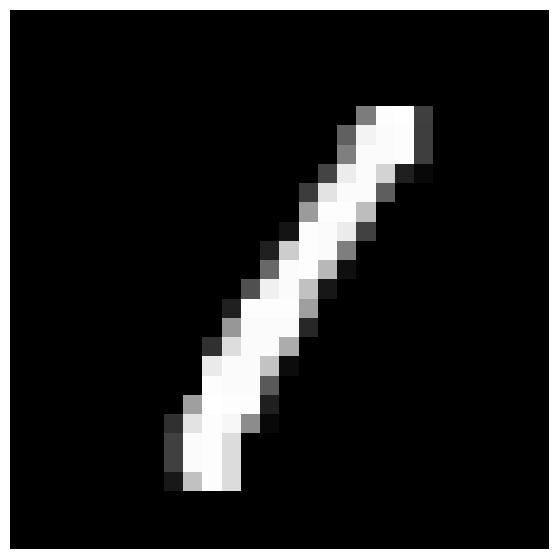

In [ ]:
plot(x)

In [ ]:
x.shape

(28, 28)

In [ ]:
x.shape[0]

28

In [ ]:
x.shape[1]

28

In [ ]:
x = x.reshape(x.shape[0]*x.shape[1],1)

In [ ]:
x.shape

(784, 1)

In [ ]:
x = x.reshape(28,28)

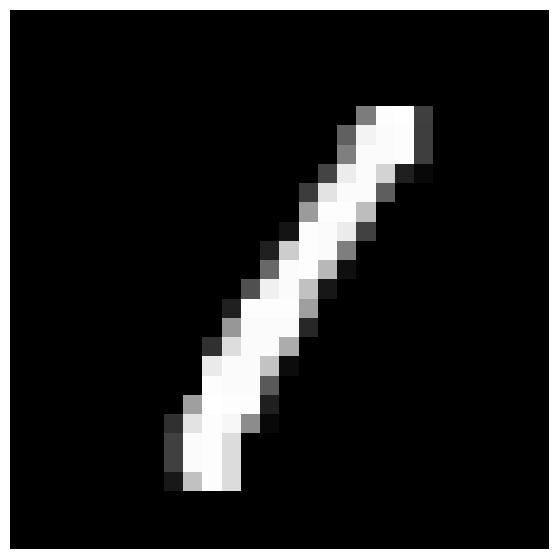

In [ ]:
plot(x)

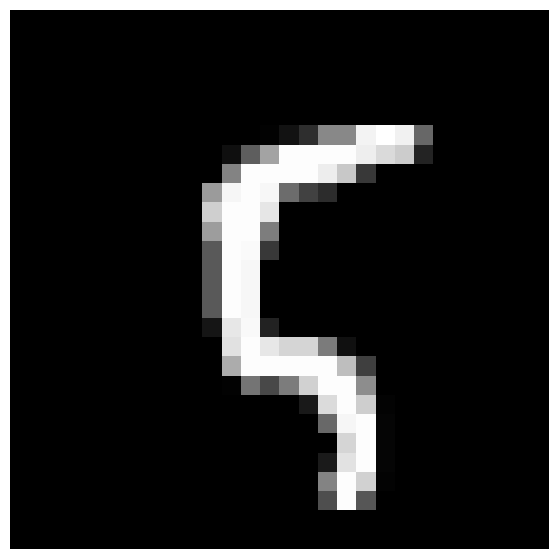

In [ ]:
plot(X[100,0,:,:])

In [ ]:
Y[120]

2

In [ ]:
X[0:25,0,:,:].shape

(25, 28, 28)

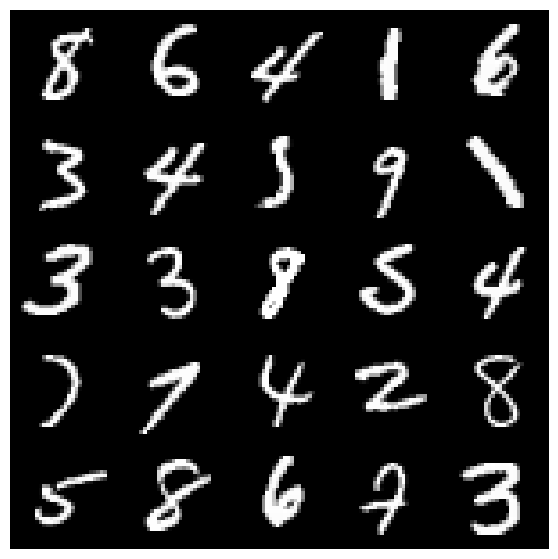

In [ ]:
montage_plot(X[125:150,0,:,:])

In [ ]:
X.shape[1]

1

In [ ]:
X_test.shape

(10000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape[0]

10000

In [ ]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [ ]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

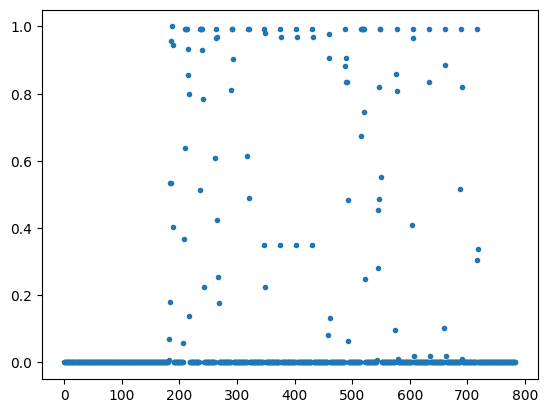

In [ ]:
plt.plot(X[100],'.')

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
###################################################

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
X = X.T

In [ ]:
X.shape

torch.Size([784, 60000])

In [ ]:
x = X[:,0:64]

In [ ]:
Y[0:64]

tensor([5., 0., 4., 1., 9., 2., 1., 3., 1., 4., 3., 5., 3., 6., 1., 7., 2., 8.,
        6., 9., 4., 0., 9., 1., 1., 2., 4., 3., 2., 7., 3., 8., 6., 9., 0., 5.,
        6., 0., 7., 6., 1., 8., 7., 9., 3., 9., 8., 5., 9., 3., 3., 0., 7., 4.,
        9., 8., 0., 9., 4., 1., 4., 4., 6., 0.], device='cuda:0')

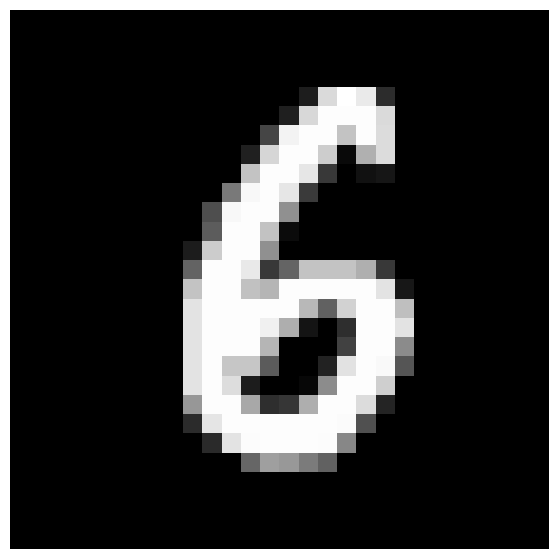

In [ ]:
plot(x[:,62].reshape(28,28))

In [ ]:
M = GPU(np.random.rand(10,784))

In [ ]:
M.shape,x.shape

(torch.Size([10, 784]), torch.Size([784, 64]))

In [ ]:
#M@x

In [ ]:
y = M@x

In [ ]:
y.shape

torch.Size([10, 64])

In [ ]:
torch.max(y,0)

torch.return_types.max(
values=tensor([56.9801, 65.2085, 40.8196, 36.1384, 48.6118, 60.8151, 37.2726, 75.4902,
        23.6046, 45.9093, 59.2288, 29.5092, 76.0879, 58.5784, 25.0242, 50.7123,
        51.0889, 56.3243, 29.1807, 36.0293, 71.5260, 74.7859, 34.0024, 35.4598,
        44.0506, 87.2667, 30.1632, 95.2230, 87.7266, 34.2116, 52.8374, 68.5500,
        37.5725, 43.9465, 75.6361, 33.2761, 66.0768, 76.9461, 45.9377, 58.9509,
        29.2141, 59.8455, 28.2970, 36.5839, 39.9538, 50.5099, 49.6241, 46.3476,
        37.6674, 68.8435, 39.3710, 96.1624, 62.1412, 34.1362, 50.6377, 67.4272,
        86.6465, 42.0667, 73.9324, 36.7552, 63.8129, 37.9445, 63.8260, 97.8616],
       device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([8, 9, 9, 9, 9, 6, 6, 9, 6, 4, 9, 9, 9, 7, 9, 4, 9, 9, 6, 4, 9, 9, 4, 9,
        5, 9, 6, 1, 1, 0, 9, 9, 4, 4, 4, 6, 6, 1, 1, 4, 9, 9, 9, 9, 1, 9, 6, 7,
        6, 1, 1, 9, 1, 0, 1, 4, 9, 4, 1, 9, 9, 7, 9, 9], device='cuda:0'))

In [ ]:
y = torch.argmax(y,0)

In [ ]:
y

tensor([8, 9, 9, 9, 9, 6, 6, 9, 6, 4, 9, 9, 9, 7, 9, 4, 9, 9, 6, 4, 9, 9, 4, 9,
        5, 9, 6, 1, 1, 0, 9, 9, 4, 4, 4, 6, 6, 1, 1, 4, 9, 9, 9, 9, 1, 9, 6, 7,
        6, 1, 1, 9, 1, 0, 1, 4, 9, 4, 1, 9, 9, 7, 9, 9], device='cuda:0')

In [ ]:
Y[0:64]

tensor([5., 0., 4., 1., 9., 2., 1., 3., 1., 4., 3., 5., 3., 6., 1., 7., 2., 8.,
        6., 9., 4., 0., 9., 1., 1., 2., 4., 3., 2., 7., 3., 8., 6., 9., 0., 5.,
        6., 0., 7., 6., 1., 8., 7., 9., 3., 9., 8., 5., 9., 3., 3., 0., 7., 4.,
        9., 8., 0., 9., 4., 1., 4., 4., 6., 0.], device='cuda:0')

In [ ]:
y == Y[0:64]

tensor([False, False, False, False,  True, False, False, False, False,  True,
        False, False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False, False,
        False, False, False,  True, False,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False], device='cuda:0')

In [ ]:
torch.sum((y == Y[0:64]))

tensor(6, device='cuda:0')

In [ ]:
torch.sum((y == Y[0:64]))/64

tensor(0.0938, device='cuda:0')

In [ ]:
batch_size = 64

M = GPU(np.random.rand(10,784))

y = M@x

y = torch.argmax(y,0)

torch.sum((y == Y[0:batch_size]))/batch_size

tensor(0.1250, device='cuda:0')

In [ ]:
z = np.random.rand(10,784)

In [ ]:
z.shape

(10, 784)

In [ ]:
z.shape[0],z.shape[1]

(10, 784)

In [ ]:
count = z.shape[0]*z.shape[1]

In [ ]:
z = z.reshape(count,)

In [ ]:
z.shape

(7840,)

In [ ]:
z = np.random.rand(10,784)

In [ ]:
z.shape

(10, 784)

In [ ]:
z = z.flatten()

In [ ]:
z.shape

(7840,)

In [ ]:
z = np.random.rand(1000,78)

In [ ]:
z = z.reshape(-1)

In [ ]:
z.shape

(78000,)

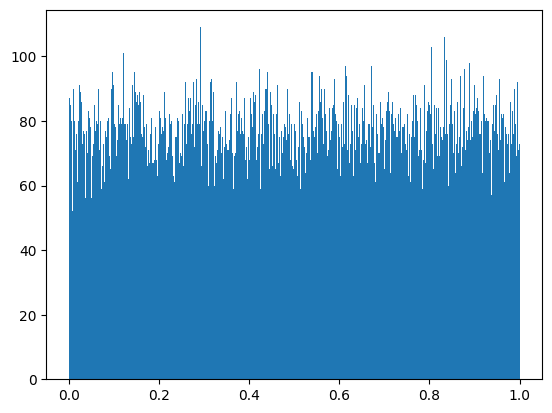

In [ ]:
plt.hist(z,1000);

In [ ]:
z = 1000*np.random.rand(10000) + 100

In [ ]:
z

array([ 701, 1032, 1057, ...,  531,  312,  598])

In [ ]:
np.max(z)

1099

In [ ]:
z =z.astype(int)

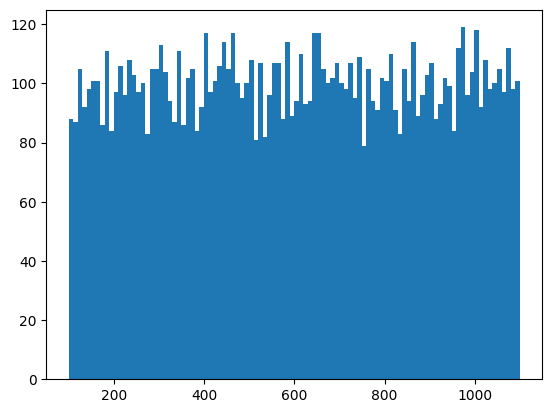

In [ ]:
plt.hist(z,100);

In [ ]:
z

array([ 701, 1032, 1057, ...,  531,  312,  598])

In [ ]:
z = 10*np.random.randn(10000) - 10

In [ ]:
z = z.flatten()

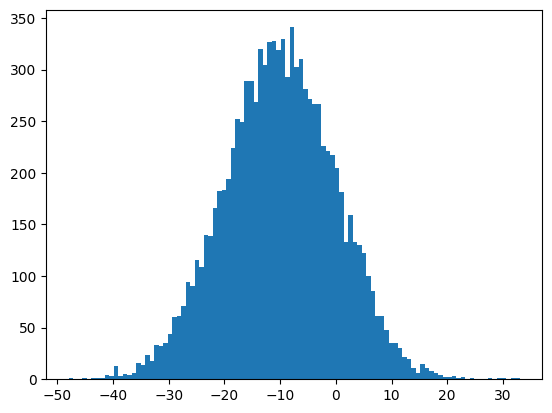

In [ ]:
plt.hist(z,100);

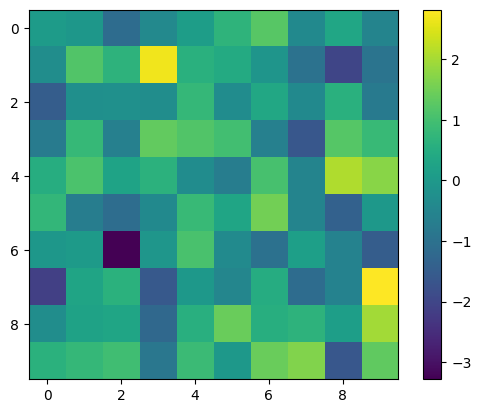

In [ ]:
z = np.random.randn(10,10)
plt.imshow(z)
plt.colorbar()

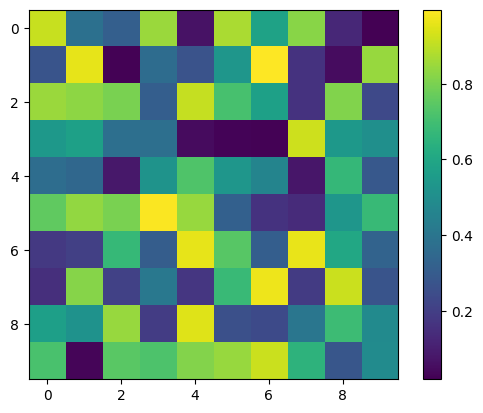

In [ ]:
z = np.random.rand(10,10)
plt.imshow(z)
plt.colorbar()

In [ ]:
M_Best = 0
Score_Best = 0

for i in range(100000):

    M_new = GPU(np.random.rand(10,784))

    y = M_new@x

    y = torch.argmax(y,0)

    Score = (torch.sum((y == Y[0:batch_size]))/batch_size).item()

    if Score > Score_Best:

        Score_Best = Score
        M_Best = M_new

        print(i,Score_Best)



In [ ]:
#37

In [ ]:
plot(GPU(np.random.randn(10,784)))

In [ ]:
# Random Walk

In [ ]:
import torch
import numpy as np
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [ ]:
def plot(x,title=None):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.title(title)
    plt.show()

In [ ]:
##MNIST
# train_set = datasets.MNIST('./data', train=True, download=True)
# test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
train_set = datasets.KMNIST('./data', train=True, download=True)
test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
#train_set = datasets.FashionMNIST('./data', train=True, download=True)
#test_set = datasets.FashionMNIST('./data', train=False, download=True)

100%|██████████| 18165135/18165135 [00:13<00:00, 1341393.75it/s]


Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 29497/29497 [00:00<00:00, 201430.45it/s]


Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 3041136/3041136 [00:03<00:00, 993453.24it/s] 


Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 5120/5120 [00:00<00:00, 6406574.13it/s]

Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw



In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
X.shape

(60000, 1, 28, 28)

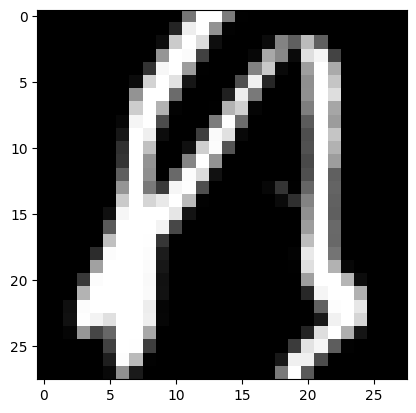

In [ ]:
plt.imshow(X[0,0,:,:],cmap='gray')

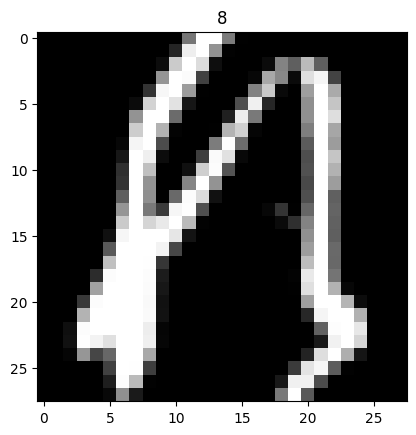

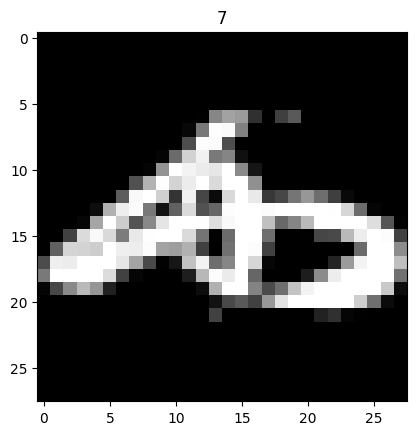

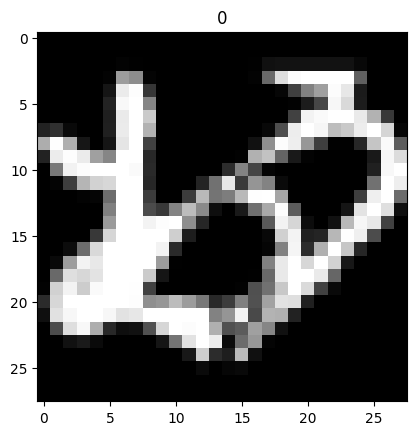

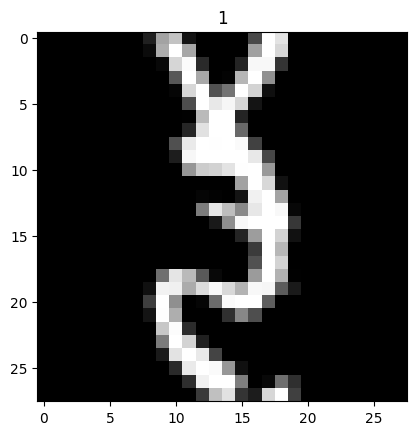

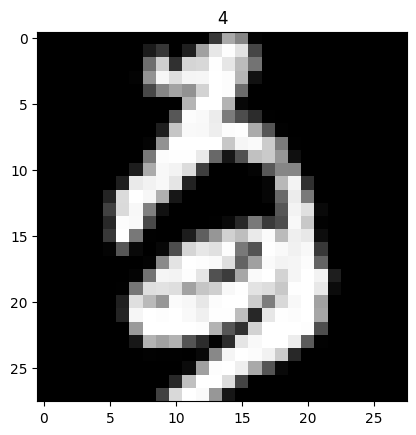

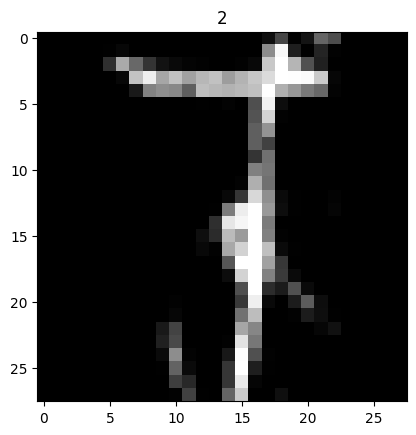

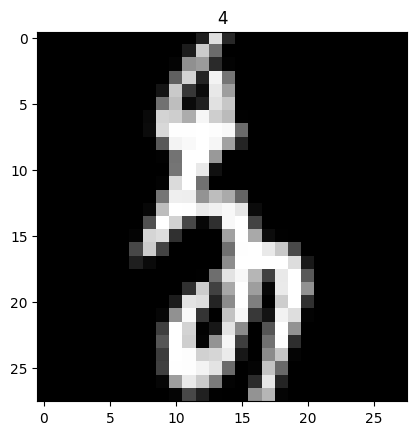

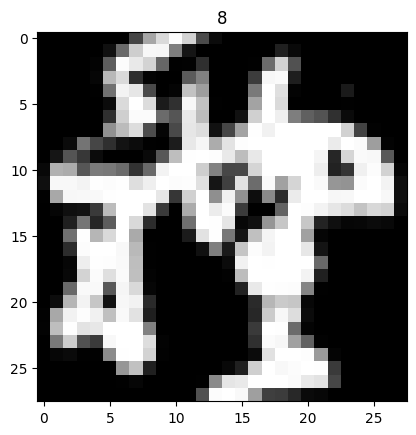

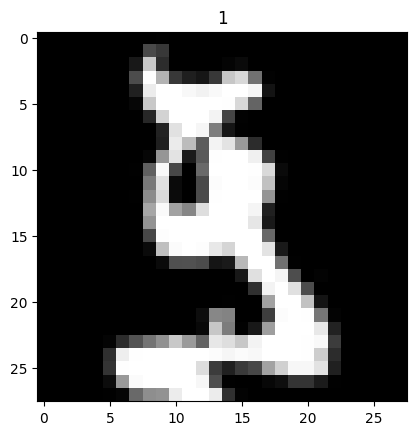

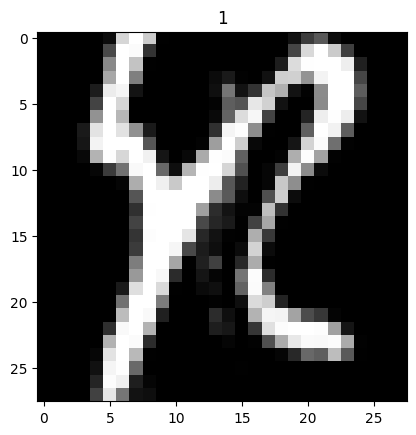

In [ ]:

for i in range(10):
    plt.imshow(X[i,0,:,:],cmap='gray')
    plt.title(str(Y[i]))
    plt.show()

In [ ]:
Y[0:10]

array([8, 7, 0, 1, 4, 2, 4, 8, 1, 1])

In [ ]:
X[0,0,:,:].shape

(28, 28)

In [ ]:
x = X[0,0,:,:].flatten()

In [ ]:
x.shape

(784,)

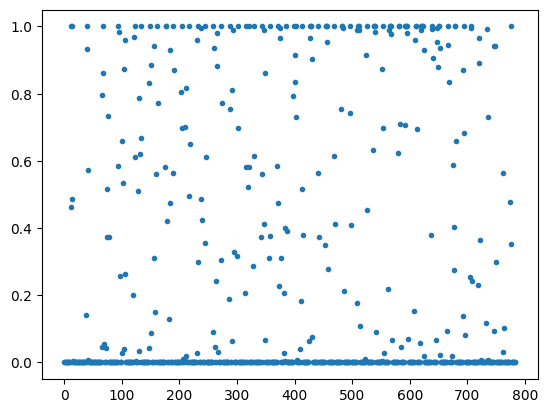

In [ ]:
plt.plot(x,'.')

In [ ]:
Y[0]

8

In [ ]:
x = x[:,None]

In [ ]:
x.shape

(784, 1)

In [ ]:
m = np.random.standard_normal((10,784))

In [ ]:
m.shape,x.shape

((10, 784), (784, 1))

In [ ]:
y = m@x # @ mean matmul

In [ ]:
y = np.matmul(m,x)

In [ ]:
y.shape

(10, 1)

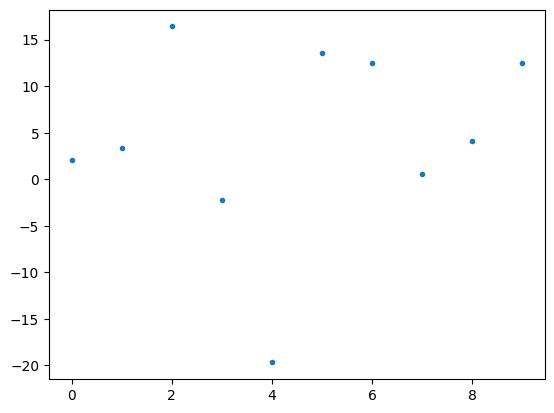

In [ ]:
plt.plot(y,'.')

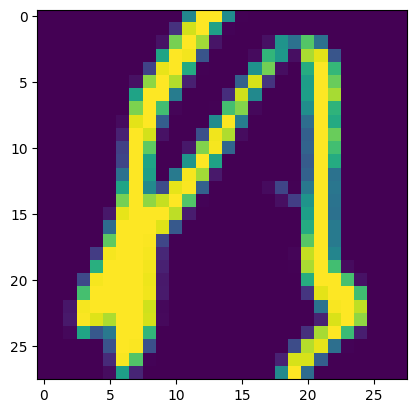

In [ ]:
plt.imshow(x.reshape(28,28))

In [ ]:
X.shape

(60000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X.shape[2]*X.shape[3]

784

In [ ]:
X = np.reshape(X, (X.shape[0],X.shape[2]*X.shape[3]))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[2]*X_test.shape[3]))

In [ ]:
X.shape

(60000, 784)

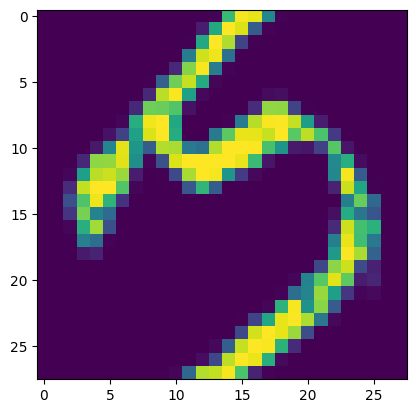

In [ ]:
plt.imshow(X[1000,:].reshape(28,28))

In [ ]:
Y[1000]

3

In [ ]:
x = X[0:2,:]

In [ ]:
x.shape

(2, 784)

In [ ]:
x = x.T

In [ ]:
m.shape,x.shape

((10, 784), (784, 2))

In [ ]:
y = m@x

In [ ]:
y

array([[  2.02776964,  -2.65141831],
       [  3.36193454,   0.35205301],
       [ 16.41708312,  15.07103832],
       [ -2.22597695,  12.80512466],
       [-19.68281089, -24.87134462],
       [ 13.53781008,  14.18171005],
       [ 12.53514404,  14.8779231 ],
       [  0.55347142, -11.97108023],
       [  4.11962146,  -2.97326031],
       [ 12.46788455,   1.32825166]])

In [ ]:
np.max(y, axis=0)

array([16.41708312, 15.07103832])

In [ ]:
y = np.argmax(y, axis=0)

In [ ]:
Y[0:2]

array([8, 7])

In [ ]:
y_ans = Y[0:2]

In [ ]:
y_ans

array([8, 7])

In [ ]:
y

array([2, 2])

In [ ]:
np.sum((y == y_ans))/len(y)

0.0

In [ ]:
X.shape

(60000, 784)

In [ ]:
X = X.T

In [ ]:
X_test = X_test.T

In [ ]:
m.shape,X.shape

((10, 784), (784, 60000))

In [ ]:
y = m@X

In [ ]:
y.shape

(10, 60000)

In [ ]:
y = np.argmax(y, axis=0)

In [ ]:
y_ans = Y

In [ ]:
acc = np.sum(y == y_ans)/len(Y)

In [ ]:
acc

0.09065

In [ ]:
m = np.random.standard_normal((10,784))

y = m@X

y = np.argmax(y, axis=0)

acc = np.sum(y == y_ans)/len(Y)

print(acc)

0.11021666666666667


In [ ]:
m_best = 0
acc_best = 0

for i in range(1000):

    m = 0.1*np.random.standard_normal((10,784))

    y = m@X

    y = np.argmax(y, axis=0)

    acc = np.sum(y == y_ans)/len(Y)


    if acc > acc_best:
        print(acc)
        m_best = m
        acc_best = acc

0.07581666666666667
0.0996
0.1141
0.11663333333333334
0.14086666666666667
0.14296666666666666


KeyboardInterrupt: ignored

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
# def scale(img):
#     img_min = torch.min(img)
#     img_max = torch.max(img)
#     scaled = (img - img_min) / (img_max - img_min) * 1.0
#     return scaled

In [ ]:
# X = scale(X)
# X_test = scale(X_test)

In [ ]:
m_best = 0
acc_best = 0

for i in range(100000):

    step = 0.0000000001

    m_random = GPU_data(np.random.randn(10,784))

    m = m_best  + step*m_random

    y = m@X

    y = torch.argmax(y, axis=0)

    acc = ((y == Y)).sum()/len(Y)


    if acc > acc_best:
        print(acc.item())
        m_best = m
        acc_best = acc

In [ ]:
m_random = GPU_data(np.random.randn(10,784))

In [ ]:
m_random.shape

torch.Size([10, 784])

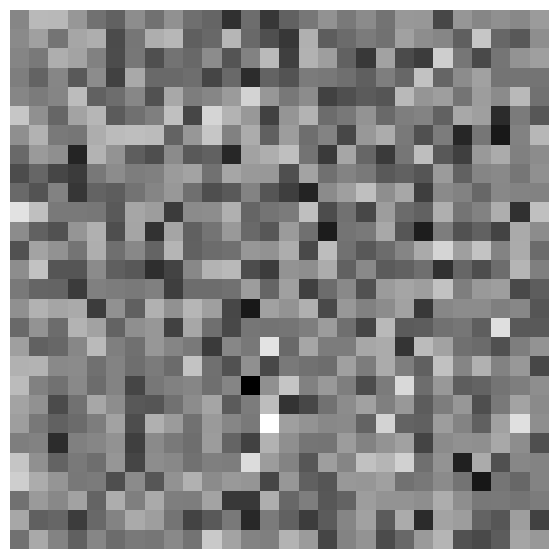

In [ ]:
plot(m_random[0,:].reshape(28,28))

In [ ]:
m_best.shape

torch.Size([10, 784])

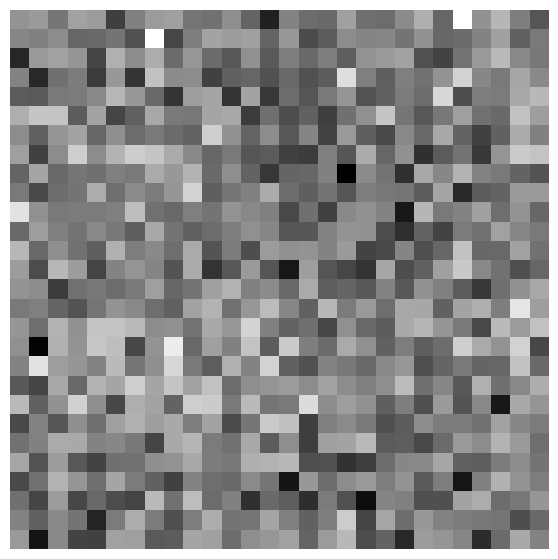

In [ ]:
plot(m_best[0,:].reshape(28,28))

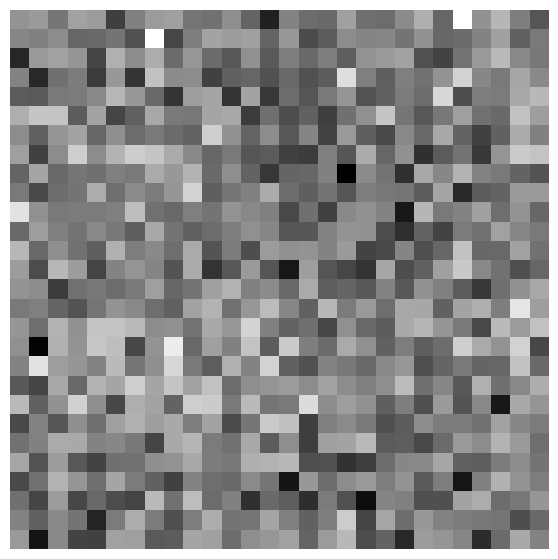

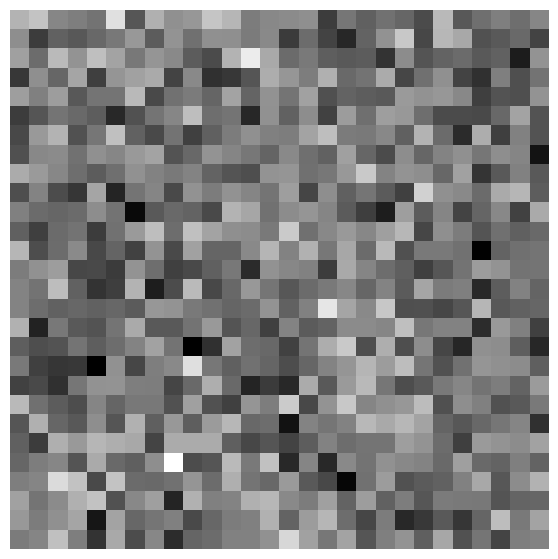

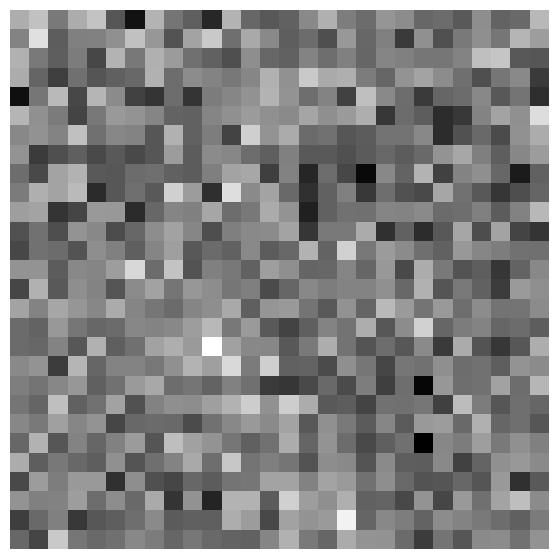

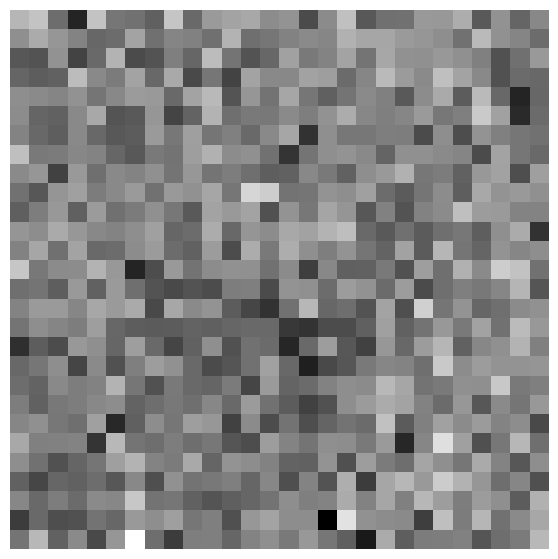

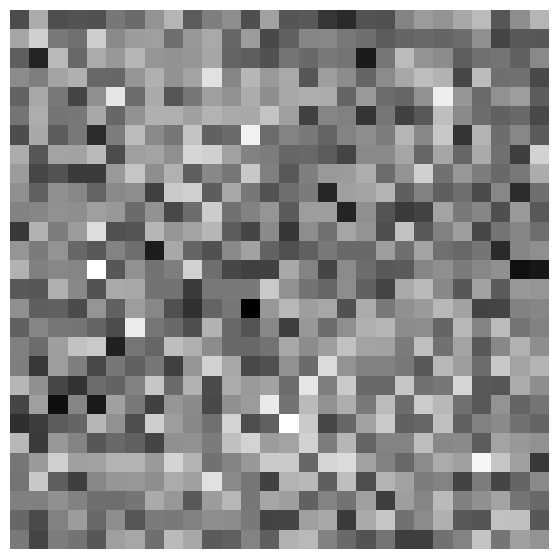

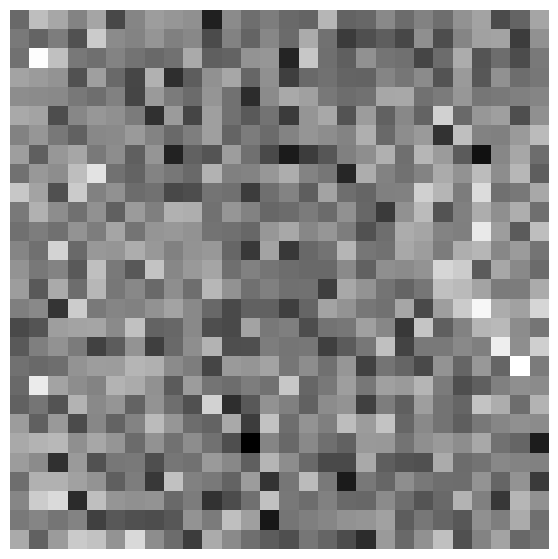

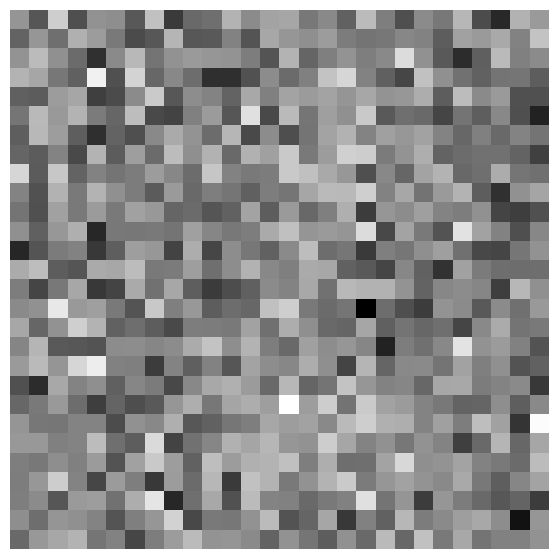

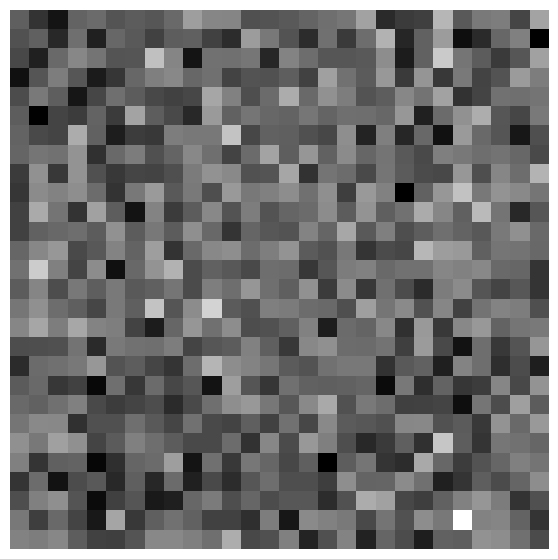

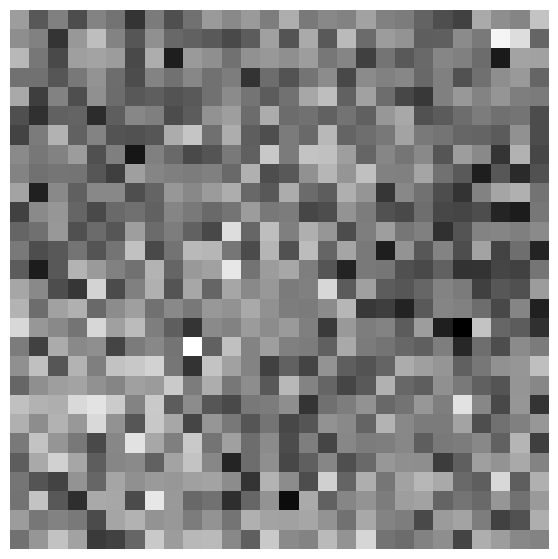

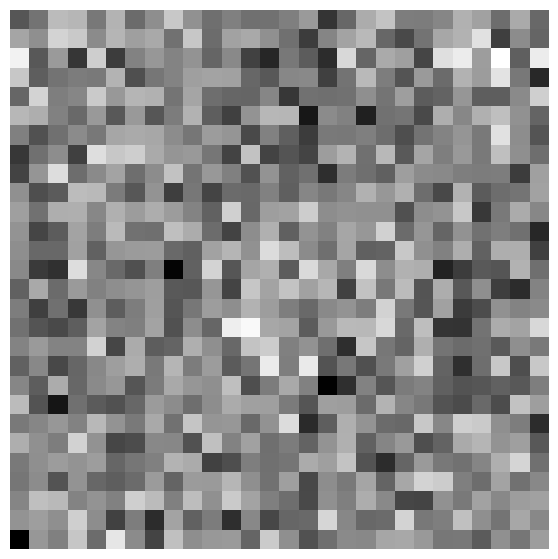

In [ ]:
for i in range(10):
    plot(m_best[i,:].reshape(28,28))

In [ ]:
M = GPU_data(np.random.random((100,10,784)))
M.shape,X.shape
(M@X).shape
(torch.argmax((M@X), axis=1) == Y).shape
Y.shape
y = torch.argmax((M@X), axis=1)
score = ((y == Y).sum(1)/len(Y))
s = torch.argsort(score,descending=True)
score[s]

tensor([0.1719, 0.1615, 0.1580, 0.1507, 0.1434, 0.1430, 0.1409, 0.1395, 0.1370,
        0.1357, 0.1338, 0.1336, 0.1302, 0.1286, 0.1284, 0.1267, 0.1264, 0.1261,
        0.1248, 0.1237, 0.1227, 0.1224, 0.1213, 0.1209, 0.1206, 0.1195, 0.1194,
        0.1193, 0.1177, 0.1124, 0.1123, 0.1120, 0.1117, 0.1117, 0.1103, 0.1094,
        0.1076, 0.1076, 0.1068, 0.1057, 0.1047, 0.1030, 0.1024, 0.1019, 0.1005,
        0.1001, 0.0998, 0.0986, 0.0984, 0.0982, 0.0973, 0.0972, 0.0966, 0.0963,
        0.0956, 0.0949, 0.0945, 0.0933, 0.0932, 0.0916, 0.0914, 0.0912, 0.0906,
        0.0900, 0.0895, 0.0889, 0.0888, 0.0883, 0.0881, 0.0881, 0.0875, 0.0861,
        0.0850, 0.0847, 0.0846, 0.0842, 0.0834, 0.0828, 0.0825, 0.0821, 0.0817,
        0.0800, 0.0796, 0.0776, 0.0772, 0.0756, 0.0750, 0.0742, 0.0735, 0.0732,
        0.0711, 0.0698, 0.0695, 0.0692, 0.0690, 0.0675, 0.0671, 0.0671, 0.0488,
        0.0470], device='cuda:0')

In [ ]:
N = 100
M = GPU_data(np.random.rand(N,10,784))

m_best = 0
acc_best = 0

step = 0.00000000001

for i in range(1000000):

    y = torch.argmax((M@X), axis=1)
    score = ((y == Y).sum(1)/len(Y))
    s = torch.argsort(score,descending=True)
    M = M[s]

    M[50:100] = 0
    M[0:50] = M[0]
    M[1:] += step*GPU_data(np.random.rand(N-1,10,784))


    acc = score[s][0].item()

    if acc > acc_best:

        m_best = M[0]
        acc_best = acc

        print(i,acc)

0 0.1725500077009201
7 0.1747666746377945
8 0.19120000302791595
9 0.19785000383853912
10 0.21930000185966492
11 0.2357500046491623
12 0.25343334674835205
13 0.2648666799068451
14 0.27230000495910645
15 0.28396666049957275
17 0.28886666893959045
18 0.30043333768844604
19 0.3025999963283539
20 0.3216666579246521
21 0.3254166841506958
22 0.3386833369731903
23 0.348633348941803
24 0.3499666750431061
25 0.3557499945163727
26 0.3563166558742523
27 0.3647833466529846
29 0.36606666445732117
30 0.375733345746994
31 0.3811666667461395
32 0.38960000872612
33 0.39544999599456787
34 0.4025999903678894
35 0.4047999978065491
36 0.4078666567802429
37 0.41046667098999023
38 0.4147833287715912
39 0.421833336353302
40 0.4323333501815796
41 0.4360499978065491
42 0.43896666169166565
43 0.44423332810401917
44 0.4499833285808563
45 0.4532333314418793
46 0.45676666498184204
47 0.45846667885780334
48 0.4619666635990143
49 0.4644833505153656
50 0.46478334069252014
51 0.466866672039032
52 0.46968334913253784
53 

KeyboardInterrupt: ignored

In [ ]:
y_test = torch.argmax((M@X_test), axis=1)
score = ((y_test == Y_test).sum(1)/len(Y_test))
s = torch.argsort(score,descending=True)
acc_test = score[s][0].item()

In [ ]:
X_test.shape

torch.Size([784, 10000])

In [ ]:
acc_test

0.5849999785423279

In [ ]:
y_test[0]

tensor([5, 9, 3,  ..., 9, 8, 6], device='cuda:0')

In [ ]:
Y_test

tensor([2., 9., 3.,  ..., 9., 4., 2.], device='cuda:0')

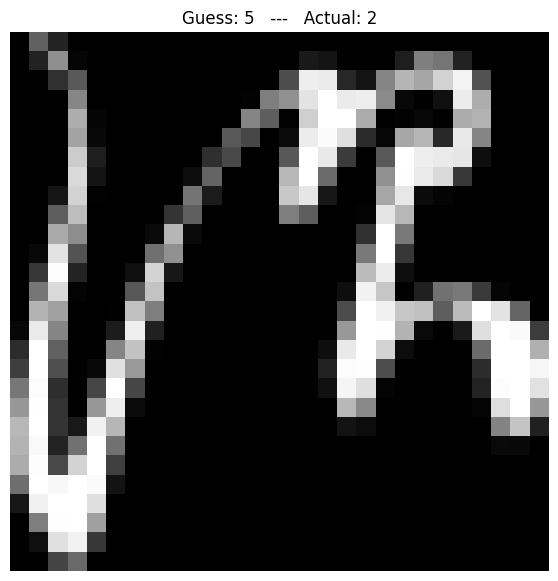

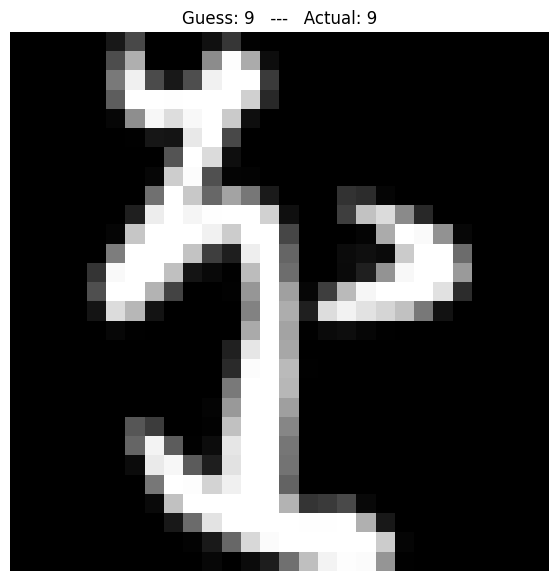

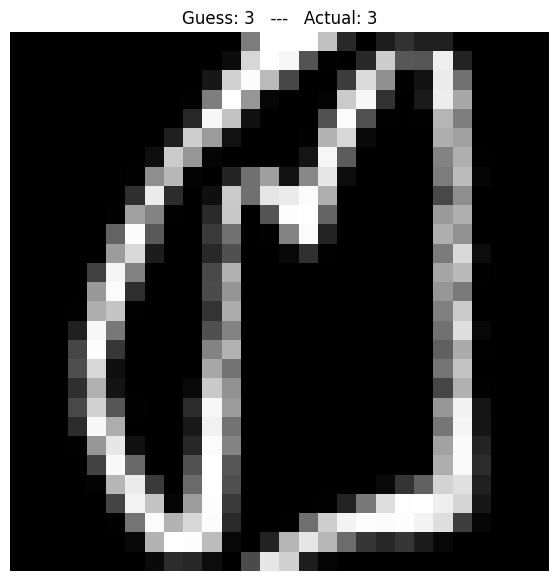

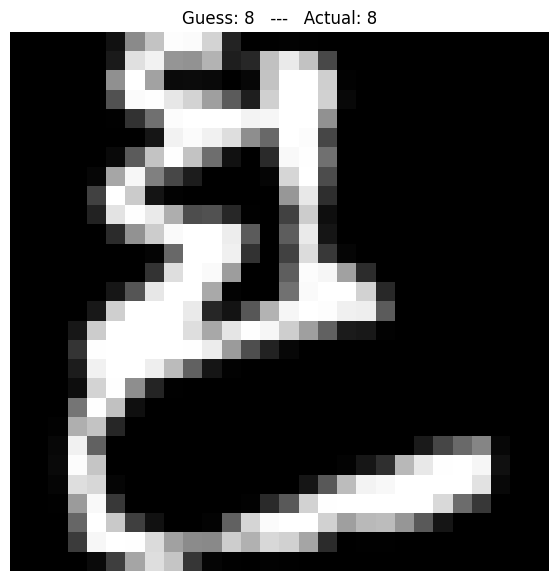

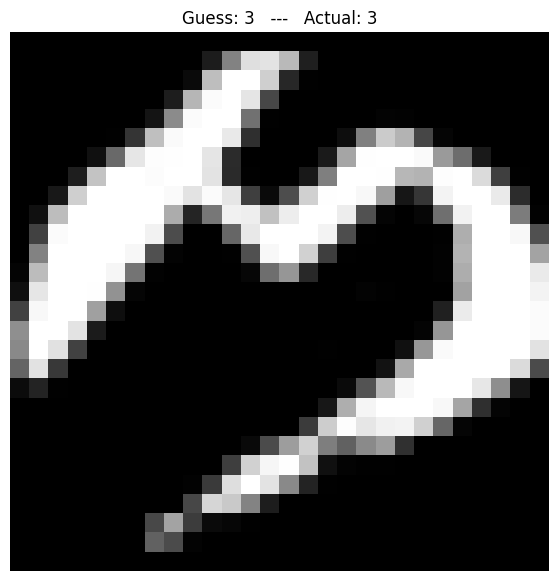

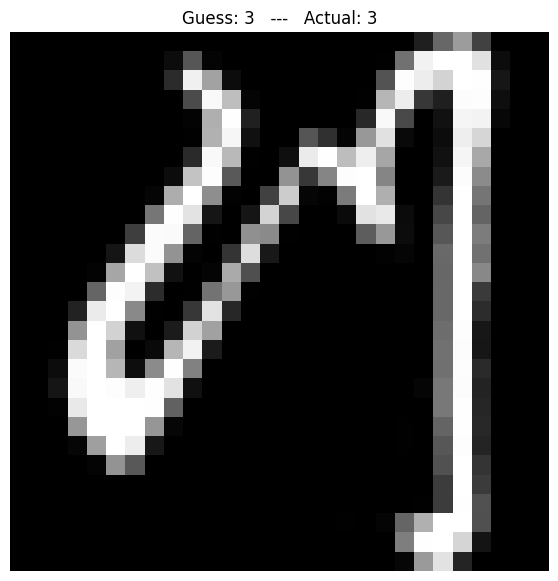

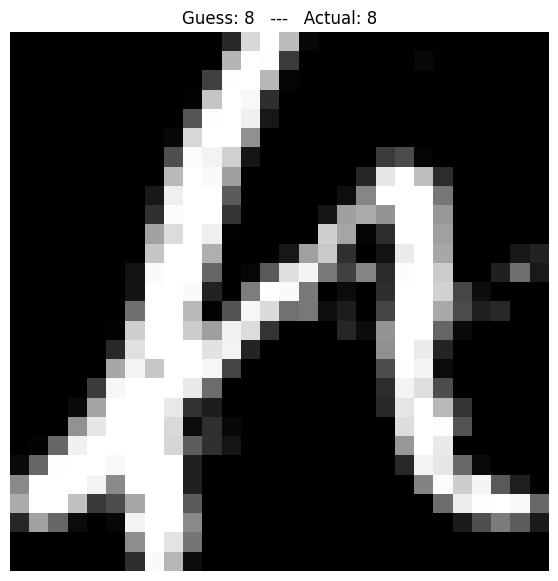

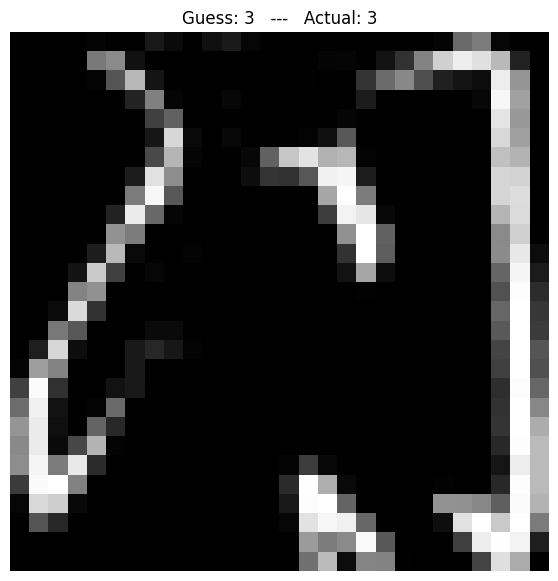

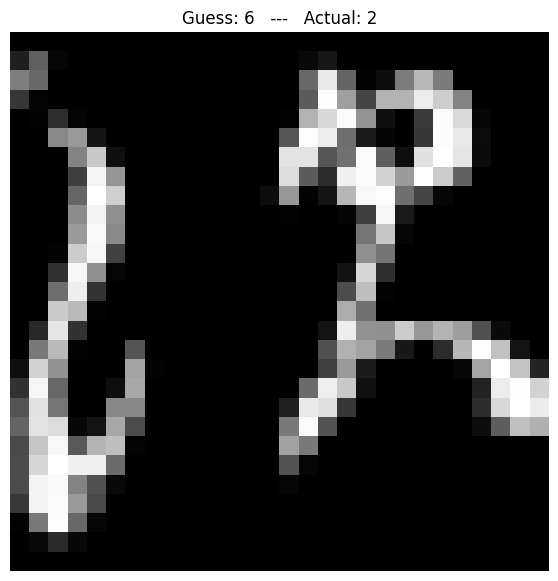

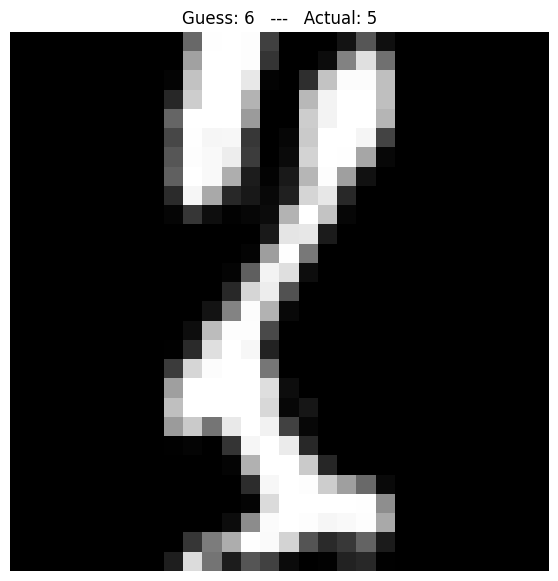

In [ ]:
for i in range(10):

    guess = y_test[0,i].item()
    answer = int(Y_test[i])

    title = f"Guess: {guess}   ---   Actual: {answer}"
    plot(X_test[:,i].reshape(28,28),title)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import base64
from io import BytesIO

def plot(x, title=None):
    if type(x) == torch.Tensor:
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap='gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.title(title)

# Convert the matplotlib plot to a base64 encoded image
def plot_to_base64():
    buf = BytesIO()
    plt.savefig(buf, format="png", bbox_inches='tight')
    plt.close()
    return base64.b64encode(buf.getvalue()).decode('utf-8')

# Generate the HTML content
html_content = "<html><body>"

for i in range(10):

    guess = y_test[0, i].item()
    answer = int(Y_test[i])

    title = f"Guess: {guess}   ---   Actual: {answer}"
    plot(X_test[:,i].reshape(28,28),title)
    img_b64 = plot_to_base64()


    html_content += f"<h3>{title}</h3>"
    html_content += f'<img src="data:image/png;base64,{img_b64}" alt="{title}" />'


html_content += "</body></html>"


# Write the HTML content to a file
print(html_content, file=open("output.html",'w'))


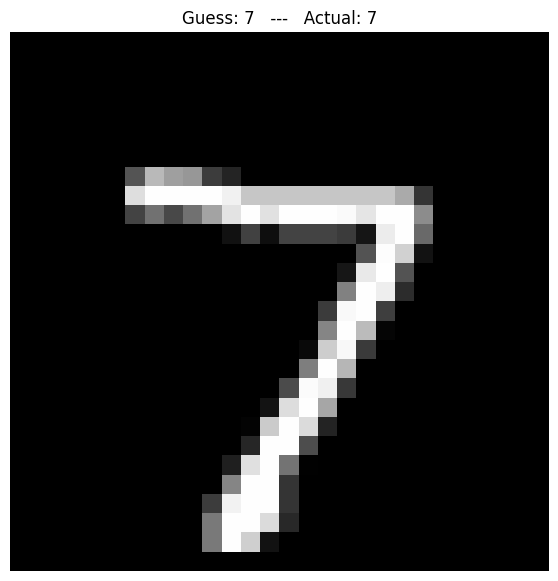
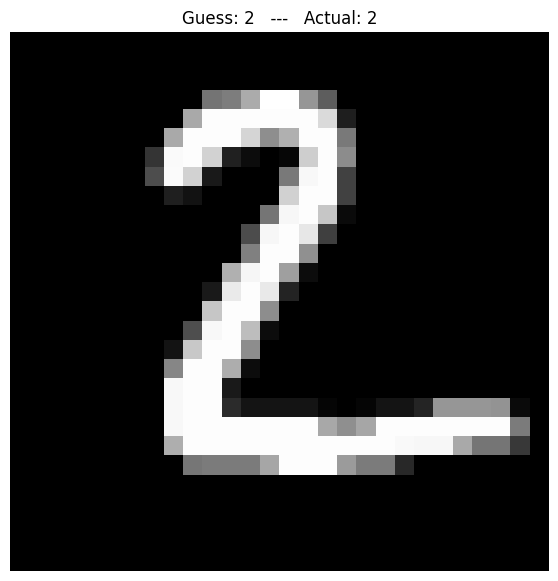
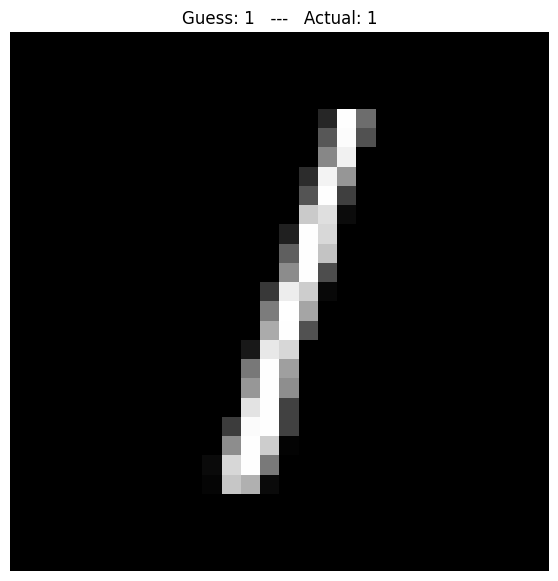
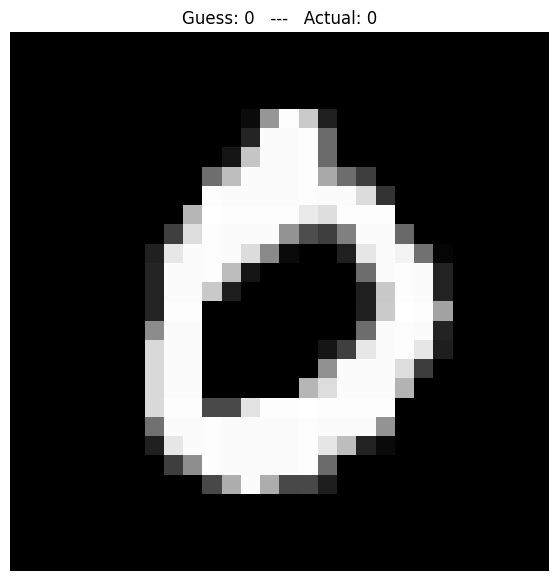
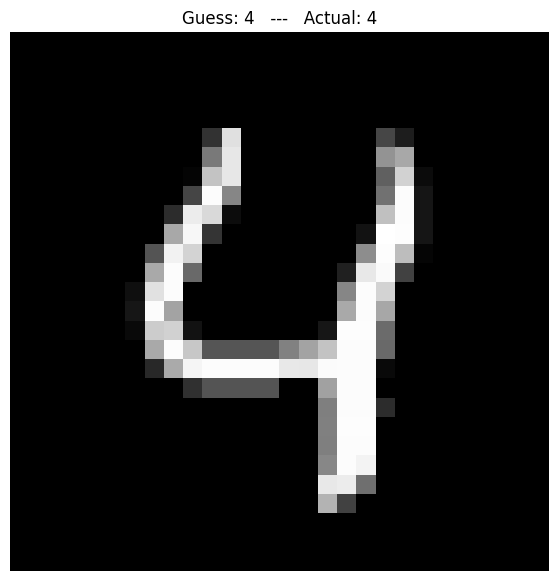
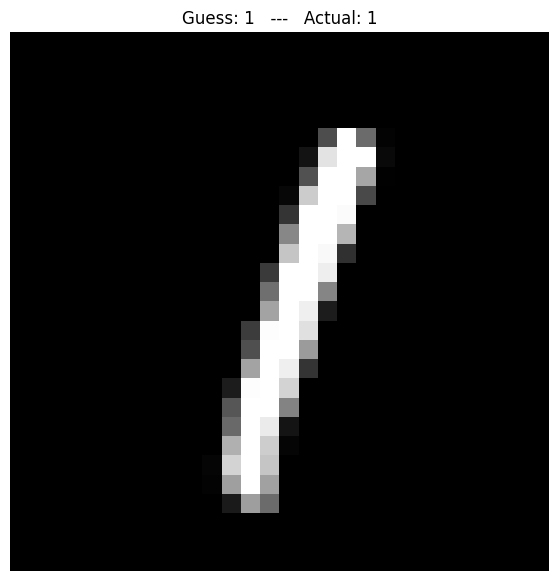
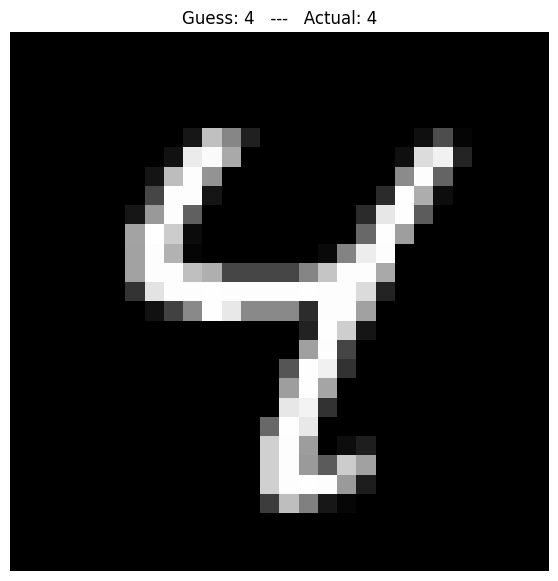
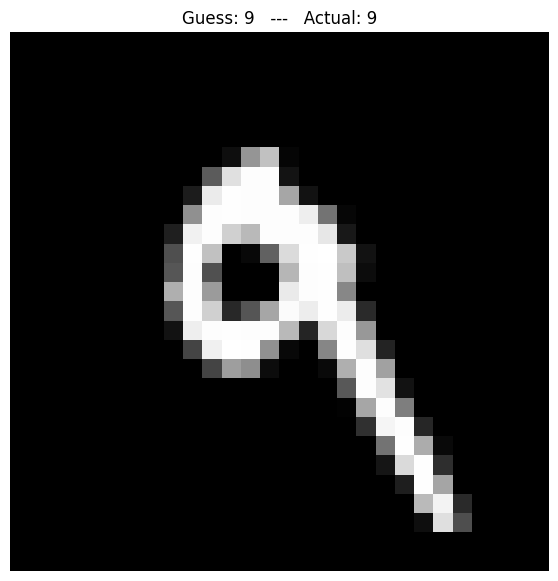
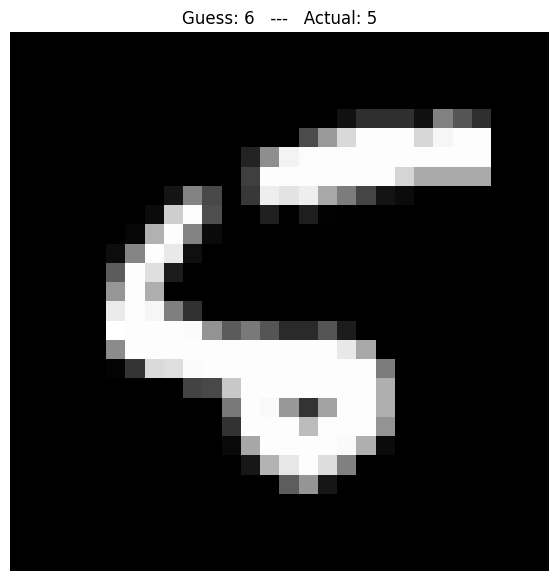
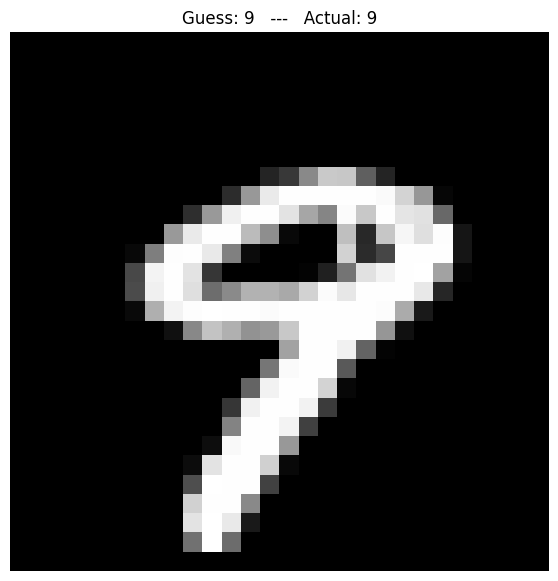

In [ ]:
import IPython
IPython.display.HTML(filename='output.html')